TITANIC DATASET INTRODUCTION

Data Dictionary of this data set:

Surviaval(0 = No, 1 = Yes )

survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown,

#Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## IMPORTING LIBRARIES STEP 1

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
#import missingno as mg 
from matplotlib import pyplot as plt
from sklearn import preprocessing 
import re
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
import researchpy as rp

#  Data Modelling Libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

from sklearn.metrics import (confusion_matrix, accuracy_score) 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
from collections import Counter
sns.set(style = 'white' , context = 'notebook', palette = 'deep')
warnings.filterwarnings('ignore', category = DeprecationWarning)
%matplotlib inline



## LOADING DATAS (from .csv format and getting knowledge about the dataset) STEP 2

In [2]:


train_data=pd.read_csv("train.csv", sep=",")
test_data=pd.read_csv("test.csv", sep=",")


## DATA QUALITY CHECK - STEP 3

In [3]:
print("DATA PREPROCESSING FIRST STEP \n" ) 
print("First 10 rows of the train data: \n")
display(train_data.head(10))


DATA PREPROCESSING FIRST STEP 

First 10 rows of the train data: 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#Returns size of dataframe/series which is equivalent to total number of elements. That is rows x columns.
print("Dataset size : ",train_data.size)


Dataset size :  10692


In [5]:
print("Shape of dataset  : ", train_data.shape) #Returns tuple of shape (Rows, columns) of dataframe/series


Shape of dataset  :  (891, 12)


In [6]:
print("Dimension of dataset  : ", train_data.ndim) #Returns dimension of dataframe/series. 1 for one dimension (series), 2 for two dimension (dataframe) 


Dimension of dataset  :  2


In [7]:
train_data.describe().T
# It finds: count,mean or average,standart deviation,min,25th percentiles,50th percentiles,75th percentiles,max values
#Age and Fare important to us.
##passengerId will be delated later because it doesn't effect our conclusion.

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
#In this step relationship betwwen attributes is examined. 
#If the correlation coefficient is negative, there is an inverse relationship between the two variables, ie "one of the variables increases while the other is decreasing". 
#If the correlation coefficient is positive, it is interpreted that "one of the variables increases while the other increases". If 0.8>, it is interpreted that there is a very high correlation.

correlation = train_data.corr()
print(correlation)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


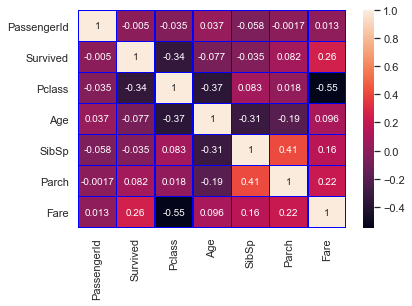

In [9]:
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)


## MISSING VALUE CHECK- Step 4

In [16]:
train_data.isnull().values.any() #If it returns true it means that we have a missing value


True

In [17]:
# Create table for missing data analysis-1
print("Missing values in the train data : ")
display(train_data.isnull().sum())


Missing values in the train data : 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# Create table for missing data analysis-2
def find_missing_data(data):
    Total = data.isnull().sum().sort_values(ascending = False)
    Percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
    
    return pd.concat([Total,Percentage] , axis = 1 , keys = ['Total' , 'Percent'])

print("Missing values in the train data as Total and Percentage : \n")
display(find_missing_data(train_data))

print("Missing values in the test data as Total and Percentage : \n")
find_missing_data(test_data)


Missing values in the train data as Total and Percentage : 



,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


Missing values in the test data as Total and Percentage : 



,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


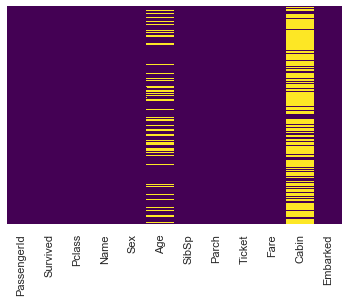

In [19]:
# checking only train set - visualize
sns.heatmap(train_data.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis') #This map shows us the Cabain and Age columns have lots of missing values, in next steps these columns must be filled. 

# TARGET IDENTIFICATION

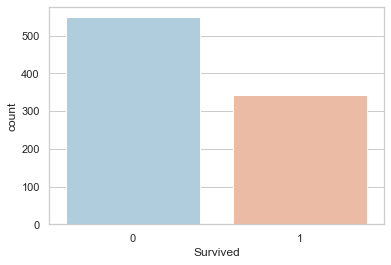

In [20]:
# Our target is completely about Survived value((0/1, Not-survived/Survived)
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_data,palette='RdBu_r')

Deleting Embarked Missing Values- STEP 4 Cont.


In [21]:
#I selected not missing values in Embarked Column
train_data = train_data[train_data['Embarked'].notna()]


In [22]:
find_missing_data(train_data)

,Total,Percent
Cabin,687,0.772778
Age,177,0.199100
Embarked,0,0.000000
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [23]:
# Count
print(train_data.groupby(['Embarked'])['PassengerId'].count())

# Compare with other variables
train_data.groupby(['Embarked']).mean()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


Deleting Cabin Missing Values- STEP 4 Cont.

In [24]:
#I selected not missing values in Cabin Column
train_data = train_data[train_data['Cabin'].notna()]


In [25]:
find_missing_data(train_data)

,Total,Percent
Age,19,0.094059
Embarked,0,0.000000
Cabin,0,0.000000
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


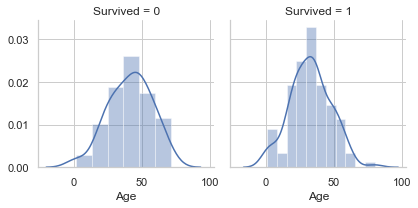

In [26]:
# Explore the Age vs Survived features
age_survived = sns.FacetGrid(train_data, col='Survived')
age_survived = age_survived.map(sns.distplot, "Age")


# OUTLIER CHECK STEP 5 (for AGE VALUES)

In [27]:
# In age column,we have a outliers as 80. I understood this in max value is too high than mean value. So, we have to eliminate age==80 values.

train_data = train_data[train_data['Age']<train_data['Age'].quantile(0.98)] 
# or it can be used: train_data = train_data[train_data['Age']<80]

In [28]:
#We can easily see max Age max values = 65, before this operation this value equals=80
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,178.0,457.000000,245.913999,2.00,265.25,457.5,678.0000,890.0000
Survived,178.0,0.685393,0.465669,0.00,0.00,1.0,1.0000,1.0000
Pclass,178.0,1.196629,0.521395,1.00,1.00,1.0,1.0000,3.0000
Age,178.0,34.704607,14.702831,0.92,24.00,35.0,47.0000,64.0000
SibSp,178.0,0.471910,0.648159,0.00,0.00,0.0,1.0000,3.0000
Parch,178.0,0.477528,0.760650,0.00,0.00,0.0,1.0000,4.0000
Fare,178.0,79.633193,77.143624,0.00,29.70,57.0,90.8094,512.3292


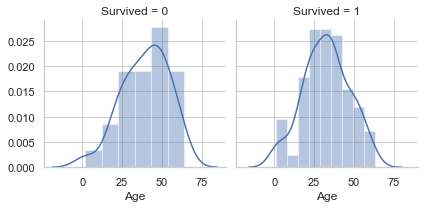

In [29]:
age_survived = sns.FacetGrid(train_data, col='Survived')
age_survived = age_survived.map(sns.distplot, "Age")

In [30]:
# OUTLIER CHECK STEP 5 (for Fare)

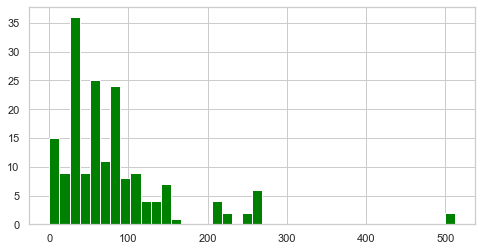

In [31]:
train_data['Fare'].hist(color='green',bins=40,figsize=(8,4))

We can see in Fare column, we can easily see there is a outlier like 512. So I want to choose fare values without outliers.

In [32]:
train_data = train_data[train_data['Fare']<train_data['Fare'].quantile(0.99)] 
# or it can be used: train_data = train_data[train_data['Fare']<500]

In [33]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,454.136364,0.681818,1.198864,34.695568,0.477273,0.477273,74.716193
std,245.807250,0.467099,0.523940,14.786265,0.649875,0.763111,62.089556
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.750000,0.000000,1.000000,24.000000,0.000000,0.000000,29.453125
50%,453.500000,1.000000,1.000000,35.000000,0.000000,0.000000,56.964600
75%,665.250000,1.000000,1.000000,47.000000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,64.000000,3.000000,4.000000,263.000000


# From now we know the means of sex groups.

In [34]:
SexMeanValue=train_data.groupby('Sex')['Age'].mean()
SexMeanValue

Sex
female    32.676136
male      36.715000
Name: Age, dtype: float64

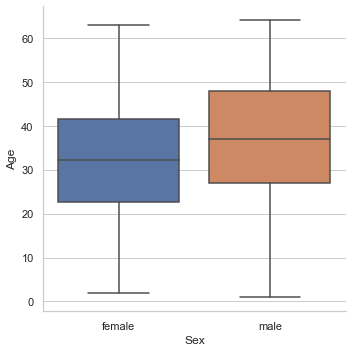

In [35]:
AS = sns.factorplot(y="Age", x="Sex", data = train_data, kind="box")


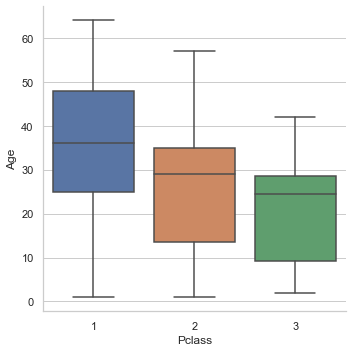

In [36]:
PA = sns.factorplot(data = train_data , x = 'Pclass' , y = 'Age', kind = 'box')

# FEATURE EXTRACTION


# -Filling Age column is filling with name rel. using Salutation (fillna)

In [37]:
train_data['Salutation'] = train_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [38]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Miss
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,Mr
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,Mr
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Mr
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,Mrs
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S,Mr


In [39]:
train_data['Age'].fillna(train_data.groupby(["Salutation","Sex"])['Age'].transform('median'),inplace=True)

In [40]:
# All missing values in age column are filled with name and Sex
find_missing_data(train_data)

,Total,Percent
Salutation,0,0.0
Embarked,0,0.0
Cabin,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0
Sex,0,0.0
Name,0,0.0


In [41]:
SexMeanValue=train_data.groupby('Sex')['Age'].mean()
SexMeanValue

Sex
female    32.676136
male      36.715000
Name: Age, dtype: float64

# Gropuping Age Values (Babies=<2, Little Children= <7 ,Children 0-15, Adults 15-45 , Elder 45+)

In [42]:
# In this case I wanted to see effects of Age groups on Survived/Not Survived
babies= train_data[train_data['Age']<=2]
little_children = train_data[train_data['Age']<7]
children= train_data[(train_data['Age']>=7) & (train_data['Age']<15)]
Adult= train_data[(train_data['Age']>=15) & (train_data['Age']<45)]
Elder= train_data[(train_data['Age']>=45) & (train_data['Age']<=65)]


In [43]:
def age_status(row):
   if row['Age'] <= 2 :
      return 'Baby'
   if (row['Age'] > 2) & (row['Age'] <= 7) :
      return 'Little Children'
   if (row['Age'] > 7) & (row['Age'] <= 15) :
      return 'Children'
   if (row['Age'] > 15) & (row['Age'] <= 45):
      return 'Adult'
   if (row['Age'] > 45) :
      return 'Elder'
    
   return 'Other'
   
   
train_data['Age_Status'] = train_data.apply (lambda row: age_status(row), axis=1)

train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Age_Status
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,Elder
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss,Little Children
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Miss,Elder
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,Mr,Adult
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,Mr,Adult
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Mr,Adult
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,Mrs,Elder
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S,Mr,Adult


In [44]:
crosstab, test_results, expected = rp.crosstab(train_data['Survived'],train_data['Age_Status'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

display(test_results)
#I considir ed p-value. If p value grater than 0.05 it means that meaningless(no-ralationship). 
#But in this case our p-value is 0.03 soo it means that there is a relationship between Age_Status and Survived.(anlamlı)

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,10.1758
1,p-value =,0.0376
2,Cramer's V =,0.2405


In [45]:
display(crosstab)
#I want to show respectively survived rate between age_status.
#In first case survived=0 1% of those who did not live were babies, but does'nt matter all baby percentage is %2.84.
#In first case survived=0 17% of those who did not live were adult, there is already a significant percentage of adults in my dataset.

#In second case survived=1 47% of those who did not live were adult, there is already a significant percentage of adults in my dataset.
#In second case survived=1 babies 1.7% of those who did not live ,  but does'nt matter all baby percentage is %2.84.
# As a result, there is a relationship, but not entirely open to interpretation.

Age_Status                                              
Age_Status      Adult  Baby Children  Elder Little Children     All
Survived                                                           
0               17.61  1.14      0.0  13.07            0.00   31.82
1               47.16  1.70      1.7  14.77            2.84   68.18
All             64.77  2.84      1.7  27.84            2.84  100.00

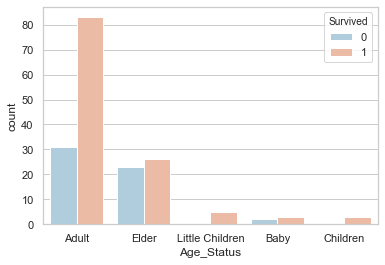

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='Age_Status',hue='Survived',data=train_data,palette='RdBu_r')

In [47]:
crosstab, test_results, expected = rp.crosstab(train_data['Survived'],train_data['Sex'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

display(test_results)
#I consided p-value. If p value= 0.00 it means that there is a meaning and relationship between Survived and Sex.

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,50.7048
1,p-value =,0.0000
2,Cramer's phi =,0.5367


In [48]:
display(crosstab)
# we can see that most of the dead are men.
# we can say that most of the survived are women.

Sex               
Sex      female   male     All
Survived                      
0          3.41  28.41   31.82
1         46.59  21.59   68.18
All       50.00  50.00  100.00

In [49]:
train_data[train_data['Age_Status']=='Adult']['Sex'].value_counts()

female    63
male      51
Name: Sex, dtype: int64

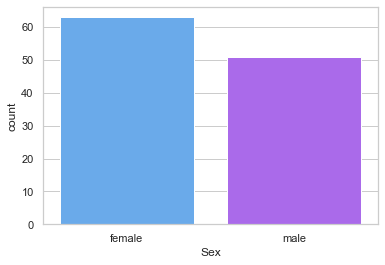

In [50]:
sns.countplot(train_data[train_data['Age_Status']=='Adult']['Sex'],palette='cool')

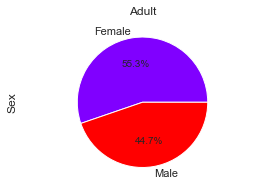

In [51]:
adult_df=train_data[train_data['Age_Status']=='Adult']
plt.figure(figsize=(20,3))

plt.subplot(144)
plt.axis('equal')
plt.title('Adult')
adult_df['Sex'].value_counts().plot.pie(labels=['Female','Male'],
        autopct='%1.1f%%',colormap='rainbow')

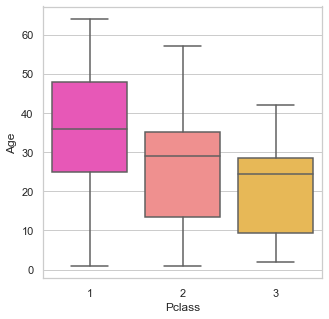

In [52]:
# Average age and passanger class
plt.figure(figsize=(5, 5))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='spring')


In [53]:
train_data[train_data['Age_Status']=='Adult']['Pclass'].value_counts()

1    97
2    10
3     7
Name: Pclass, dtype: int64

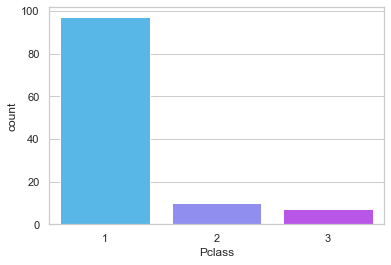

In [54]:
sns.countplot(train_data[train_data['Age_Status']=='Adult']['Pclass'],palette='cool')

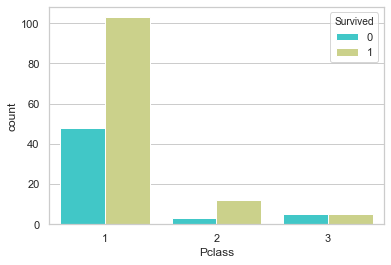

In [55]:
# Survived or Not Survived rates relationships with Pclass(1-2-3)
sns.set_style('whitegrid')
sns.countplot(x='Pclass',hue='Survived',data=train_data,palette='rainbow')


As we can interpret plot,

-All passengers who did not survive are third-class passengers.
First class passengers are the most surviving passengers.

In [56]:

embarked_dict = {
    'C':"Cherbourg",
    'S':"Southampton",
    'Q':"Queenstown",
}


In [57]:
#Embarked Visualization and Filling 

#emberked_values = train_data["Embarked"].copy() 
#emberked_values.head()
#emberked_values.replace(embarked_dict, inplace = True)
#emberked_values.replace("C",embarked_dict['C'], inplace = True)
#emberked_values.replace("S",embarked_dict['S'], inplace = True)
#emberked_values.replace("Q",embarked_dict['Q'], inplace = True)
#train_data["Embarked"] = emberked_values


train_data = train_data.replace({"Embarked": embarked_dict})

train_data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Age_Status
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Mrs,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Mrs,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,Southampton,Mr,Elder
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,Southampton,Miss,Little Children
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,Southampton,Miss,Elder


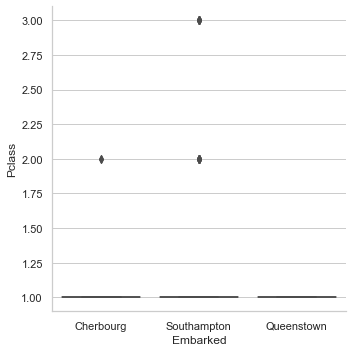

In [58]:
PA = sns.factorplot(data = train_data , x = 'Embarked' , y = 'Pclass', kind = 'box')

## TRYING TO FIND MORE RELATIONSHIPS ABOUT COLUMNS WITH OUR TARGET (SURVIVED-NOT SURVIVED)

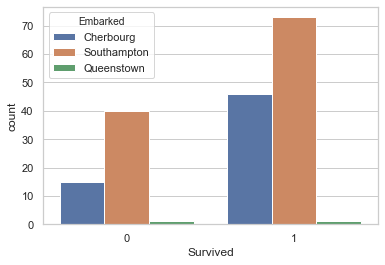

In [59]:
# Survived or Not Survived rates relationships with Embarked(S-C-Q)
#This plot shows us most of those who didn't survive were gpalette='winter'oing to embarked=s
# So, people who survived is generally bought the ticket in Southampton

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=train_data,)

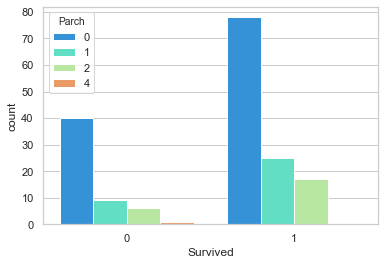

In [60]:
# Survived or Not Survived rates relationships with Parch
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Parch',data=train_data,palette='rainbow')


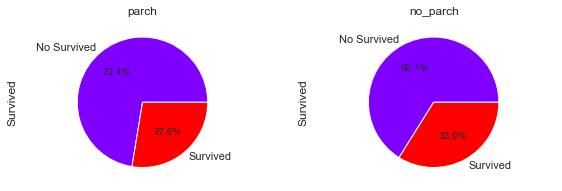

In [61]:
parch_df=train_data[train_data['Parch']!=0]
no_parch_df=train_data[train_data['Parch']==0]
plt.figure(figsize=(20,3))
plt.subplot(143)
plt.axis('equal')
plt.title('parch')
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],
        autopct='%1.1f%%',colormap='rainbow')
plt.subplot(144)
plt.axis('equal')
plt.title('no_parch')
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],
        autopct='%1.1f%%',colormap='rainbow')

In this plot, clearly I see that those who do not have parch survive more than those who have siblings. It is also clear that most people with parch did not survive.

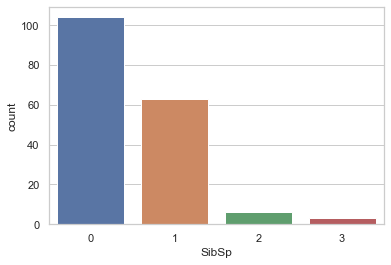

In [62]:
sns.countplot(x='SibSp',data=train_data)

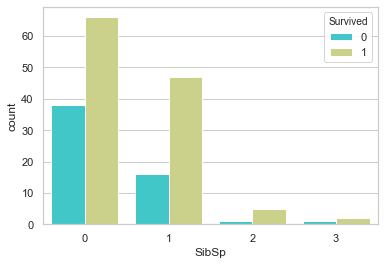

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp',hue='Survived',data=train_data,palette='rainbow')

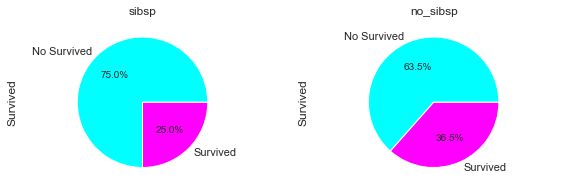

In [58]:
sibsp_df=train_data[train_data['SibSp']!=0]
no_sibsp_df=train_data[train_data['SibSp']==0]
plt.figure(figsize=(20,3))
plt.subplot(141)
plt.axis('equal')
plt.title('sibsp')
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],
        autopct='%1.1f%%',colormap='cool')
plt.subplot(142)
plt.axis('equal')
plt.title('no_sibsp')
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],
        autopct='%1.1f%%',colormap='cool')

In [59]:
#Relationship between total and survival
#Using Parch and SibSp to create a new parameter FamilySize +1 is because of calculating myself
def family_size(row):
    return row['Parch'] + row['SibSp'] + 1

train_data['FamilySize'] = train_data.apply (lambda row: family_size(row), axis=1)
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Age_Status,FamilySize
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Mrs,Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Mrs,Adult,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,Southampton,Mr,Elder,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,Southampton,Miss,Little Children,3
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,Southampton,Miss,Elder,1
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,Southampton,Mr,Adult,1
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,Southampton,Mr,Adult,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,Southampton,Mr,Adult,6
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,Cherbourg,Mrs,Elder,2
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,Southampton,Mr,Adult,2


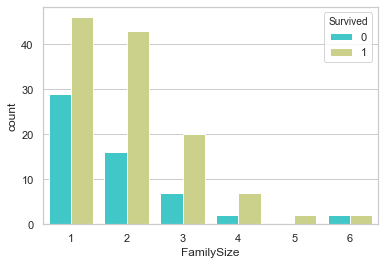

In [60]:
sns.set_style('whitegrid')
sns.countplot(x='FamilySize',hue='Survived',data=train_data,palette='rainbow')

In cases where family size is small (family size = 1 or family size = 2), we can see that survival rate is higher than large families.

In the previous top lines, we saw the 2 columns which has more missing value,than I can filled Age column with using means. But in other column which name is Cabin, values has %78 missing.I filled missing values on Cabin column but  In this case I want to drop it out from the this dataset, because I didn't think to use this values for analysing.

## COLUMN DROPPING

In [61]:
#Cabin column eliminated because it has too much missing values
pd.get_dummies(train_data.Cabin, prefix="CBN", drop_first = True)
train_new=train_data.drop('Cabin',axis=1)

In [62]:
train_new.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Salutation,Age_Status,FamilySize
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg,Mrs,Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton,Mrs,Adult,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,Southampton,Mr,Elder,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,Southampton,Miss,Little Children,3
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,Southampton,Miss,Elder,1
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,Southampton,Mr,Adult,1
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,Southampton,Mr,Adult,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,Southampton,Mr,Adult,6
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,Cherbourg,Mrs,Elder,2
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,Southampton,Mr,Adult,2


In [63]:
#GET DUMMIES+Dropping
sex = pd.get_dummies(train_new['Sex'],drop_first=True)
embark = pd.get_dummies(train_new['Embarked'],drop_first=True)
pesseengerId = pd.get_dummies(train_new['PassengerId'],drop_first=True)
ticket = pd.get_dummies(train_new['Ticket'],drop_first=True)
fare = pd.get_dummies(train_new['Fare'],drop_first=True)

In [64]:
train_new.drop(['PassengerId','Sex','Embarked','Name','Ticket','Fare'],axis=1,inplace=True)
train_new.head()

,Survived,Pclass,Age,SibSp,Parch,Salutation,Age_Status,FamilySize
1,1,1,38.0,1,0,Mrs,Adult,2
3,1,1,35.0,1,0,Mrs,Adult,2
6,0,1,54.0,0,0,Mr,Elder,1
10,1,3,4.0,1,1,Miss,Little Children,3
11,1,1,58.0,0,0,Miss,Elder,1


In [65]:
#After we eliminate the Cabin and Embarked column datas and filling Age datas we can see via  graph that  is no null value in dataset

find_missing_data(train_data)

,Total,Percent
FamilySize,0,0.0
Age_Status,0,0.0
Salutation,0,0.0
Embarked,0,0.0
Cabin,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0


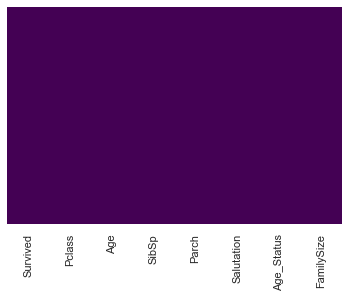

In [66]:
sns.heatmap(train_new.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

# Missing Values checked.
# Missig values filled with fillna-.
-Age-Survived
-Sex-Survived
-Pclass-Survived
-Parch-Survived
-Embarked-Survived 

#These columns relationships are checked with correlation and plots.

-Firstly Not necessary columns deleted as Cabin because it has lots of missing values.
Then PesseengerId,Sex,Embarked,Name,Ticket columns deleted after the dummies operations.